## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"], how="left")
# Display the data table for preview
data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Unique_mice_df =(data_complete["Mouse ID"]).unique()
len(Unique_mice_df)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep='last')
print(dup_mouse)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = data_complete[data_complete.duplicated(subset=["Mouse ID","Timepoint"])]
print(dup_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='last')
print(len(clean_mice_df))

1888


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_df = pd.unique(clean_mice_df["Mouse ID"])
len(number_mice_df)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

stat_mean_byregimen = clean_mice_df.groupby(["Drug Regimen"]).mean()
stat_mean_ = stat_mean_byregimen.loc[:,'Tumor Volume (mm3)']
stat_mean_bytumor = pd.Series(stat_mean_, name="Mean")
print(stat_mean_bytumor)

stat_median_byregimen = clean_mice_df.groupby(["Drug Regimen"]).median()
median_ = stat_median_byregimen.loc[:,'Tumor Volume (mm3)']
median_bytumor = pd.Series(median_, name="Median")
print(median_bytumor)

stat_variance_byregimen = clean_mice_df.groupby(["Drug Regimen"]).var()
variance_ = stat_variance_byregimen.loc[:,'Tumor Volume (mm3)']
variance_bytumor = pd.Series(variance_, name="Variance")
print(variance_bytumor)

stat_stddevi_byregimen = clean_mice_df.groupby(["Drug Regimen"]).std()
stdDevi_ = stat_stddevi_byregimen.loc[:,'Tumor Volume (mm3)']
stdDevi_bytumor = pd.Series(stdDevi_, name="Standard Deviation")
print(stdDevi_bytumor)

stat_SEM_byregimen = clean_mice_df.groupby(["Drug Regimen"]).sem()
stat_SEM_ = stat_SEM_byregimen.loc[:,'Tumor Volume (mm3)']
stat_SEM_bytumor = pd.Series(stat_SEM_, name="SEM")
print(stat_SEM_bytumor)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Mean, dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Median, dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Variance, dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.84

In [8]:
# Assemble the resulting series into a single summary dataframe.
Statistical_Summary_DF1 = pd.merge(stat_mean_bytumor, median_bytumor, right_index=True, left_index=True)
Statistical_Summary_DF2 = pd.merge(Statistical_Summary_DF1, variance_bytumor, right_index=True, left_index=True)
Statistical_Summary_DF3 = pd.merge(Statistical_Summary_DF2, stdDevi_bytumor, right_index=True, left_index=True)
Statistical_Summary_DF4 = pd.merge(Statistical_Summary_DF3, stat_SEM_bytumor, right_index=True, left_index=True)
print(Statistical_Summary_DF4)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.382993  50.783528  43.220205            6.574208  0.526358
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_mice_df.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
agg_summary

Age_months                                       Weight (g)  \
                   mean median        var       std       sem       mean   
Drug Regimen                                                               
Capomulin     13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
Ceftamin      13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
Infubinol     16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
Ketapril      15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
Naftisol      12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
Placebo       10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
Propriva      10.570513    8.0  51.678867  7.188801  0.575565  27.076923   
Ramicane      10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
Stelasyn      12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
Zoniferol     12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                                                    ... Tumor Volume (mm3)  \
             median        var       std       sem  ...               mean   
Drug Regimen                                        ...                      
Capomulin      20.5   7.466034  2.732404  0.180169  ...          40.675741   
Ceftamin       28.0   2.501016  1.581460  0.118535  ...          52.591172   
Infubinol      27.0   4.769028  2.183810  0.163684  ...          52.884795   
Ketapril       28.0   3.392536  1.841884  0.134333  ...          55.235638   
Naftisol       27.0   2.247748  1.499249  0.109930  ...          54.331565   
Placebo        28.0   3.378146  1.837973  0.136615  ...          54.033581   
Propriva       26.0   2.845658  1.686908  0.135061  ...          52.382993   
Ramicane       19.0  10.465318  3.235014  0.214244  ...          40.216745   
Stelasyn       28.0   2.701473  1.643616  0.122169  ...          54.233149   
Zoniferol      28.0   2.015300  1.419612  0.105229  ...          53.236507   

                                                       Metastatic Sites  \
                 median        var       std       sem             mean   
Drug Regimen                                                              
Capomulin     41.557809  24.947764  4.994774  0.329346         0.713043   
Ceftamin      51.776157  39.290177  6.268188  0.469821         1.179775   
Infubinol     51.820584  43.128684  6.567243  0.492236         0.960674   
Ketapril      53.698743  68.553577  8.279709  0.603860         1.297872   
Naftisol      52.509285  66.173479  8.134708  0.596466         1.182796   
Placebo       52.288934  61.168083  7.821003  0.581331         1.441989   
Propriva      50.783528  43.220205  6.574208  0.526358         0.993590   
Ramicane      40.673236  23.486704  4.846308  0.320955         0.548246   
Stelasyn      52.431737  59.450562  7.710419  0.573111         0.872928   
Zoniferol     51.818479  48.533355  6.966589  0.516398         1.230769   

                                                   
             median       var       std       sem  
Drug Regimen                                       
Capomulin         0  0.720790  0.848993  0.055981  
Ceftamin          1  1.402527  1.184283  0.088766  
Infubinol         1  1.054942  1.027104  0.076985  
Ketapril          1  1.942883  1.393873  0.101659  
Naftisol          1  1.479919  1.216519  0.089200  
Placebo           1  1.792449  1.338824  0.099514  
Propriva          1  1.193507  1.092477  0.087468  
Ramicane          0  0.477838  0.691259  0.045780  
Stelasyn          1  0.944874  0.972046  0.072252  
Zoniferol         1  1.559711  1.248884  0.092573  

[10 rows x 25 columns]

## Bar and Pie Charts

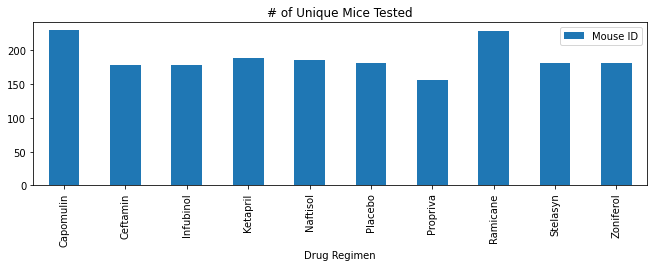

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_group = clean_mice_df.groupby(["Drug Regimen"]).count()
mice_ID = mice_group.loc[:,"Mouse ID"]
unique_mice_byregimen = pd.DataFrame(mice_ID)

unique_mice_byregimen.plot(kind="bar", figsize=(11,3))

plt.title("# of Unique Mice Tested")

plt.show()
plt.tight_layout()

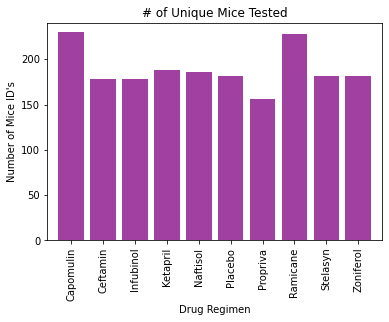

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#print(unique_mice_byregimen.index)

x_axis = np.arange(len(unique_mice_byregimen.index))
tick_locations = [value for value in x_axis]

plt.title("# of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice ID's")

plt.xlim(-.75, len(unique_mice_byregimen.index)-.25)
plt.ylim(0, max(mice_ID) +10)

plt.bar(x_axis, mice_ID, facecolor="purple", alpha=0.75, align="center")
plt.xticks(tick_locations, unique_mice_byregimen.index, rotation = 'vertical')
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female = clean_mice_df.groupby(["Mouse ID","Sex"])
mf_sum = male_female.sum()
female = "female"
Sex = mf_sum.loc[female]

mf_pie = Sex.plot(kind="pie", y="Sex", title = "Female versus Male Mice")
mf_pie.set_ylabel("Sex")

plt.show()
plt.axis("equal")
#maleVSfemale = Male_Female.count()
#maleVSfemale

KeyError: 'female'

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


#unique_mice_df
male_female = unique_mice_df.loc[:, 'Sex']
maleVSfemale = pd.Series(male_female, name="name")
maleVSfemale

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
